In [1]:
!nvidia-smi

'nvidia-smi' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [ ]:
! pip install ultralytics -q

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/Attentif_Inattentif_2'

/content/drive/MyDrive/Attentif_Inattentif_2


In [ ]:
ls

 Attentif_Inattentif_Detection.ipynb  'Training Code.ipynb'


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks



Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="w7olryNbCqiB9BulWhLv")
project = rf.workspace("hello-iqgto").project("drowsiness-detetction-system")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.45, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Drowsiness-Detetction-system-1 in yolov8:: 100%|██████████| 6354/6354 [00:48<00:00, 130.34it/s]


In [ ]:
! yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=20 \
imgsz=640

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Attentif_Inattentif_2/Drowsiness-Detetction-system-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

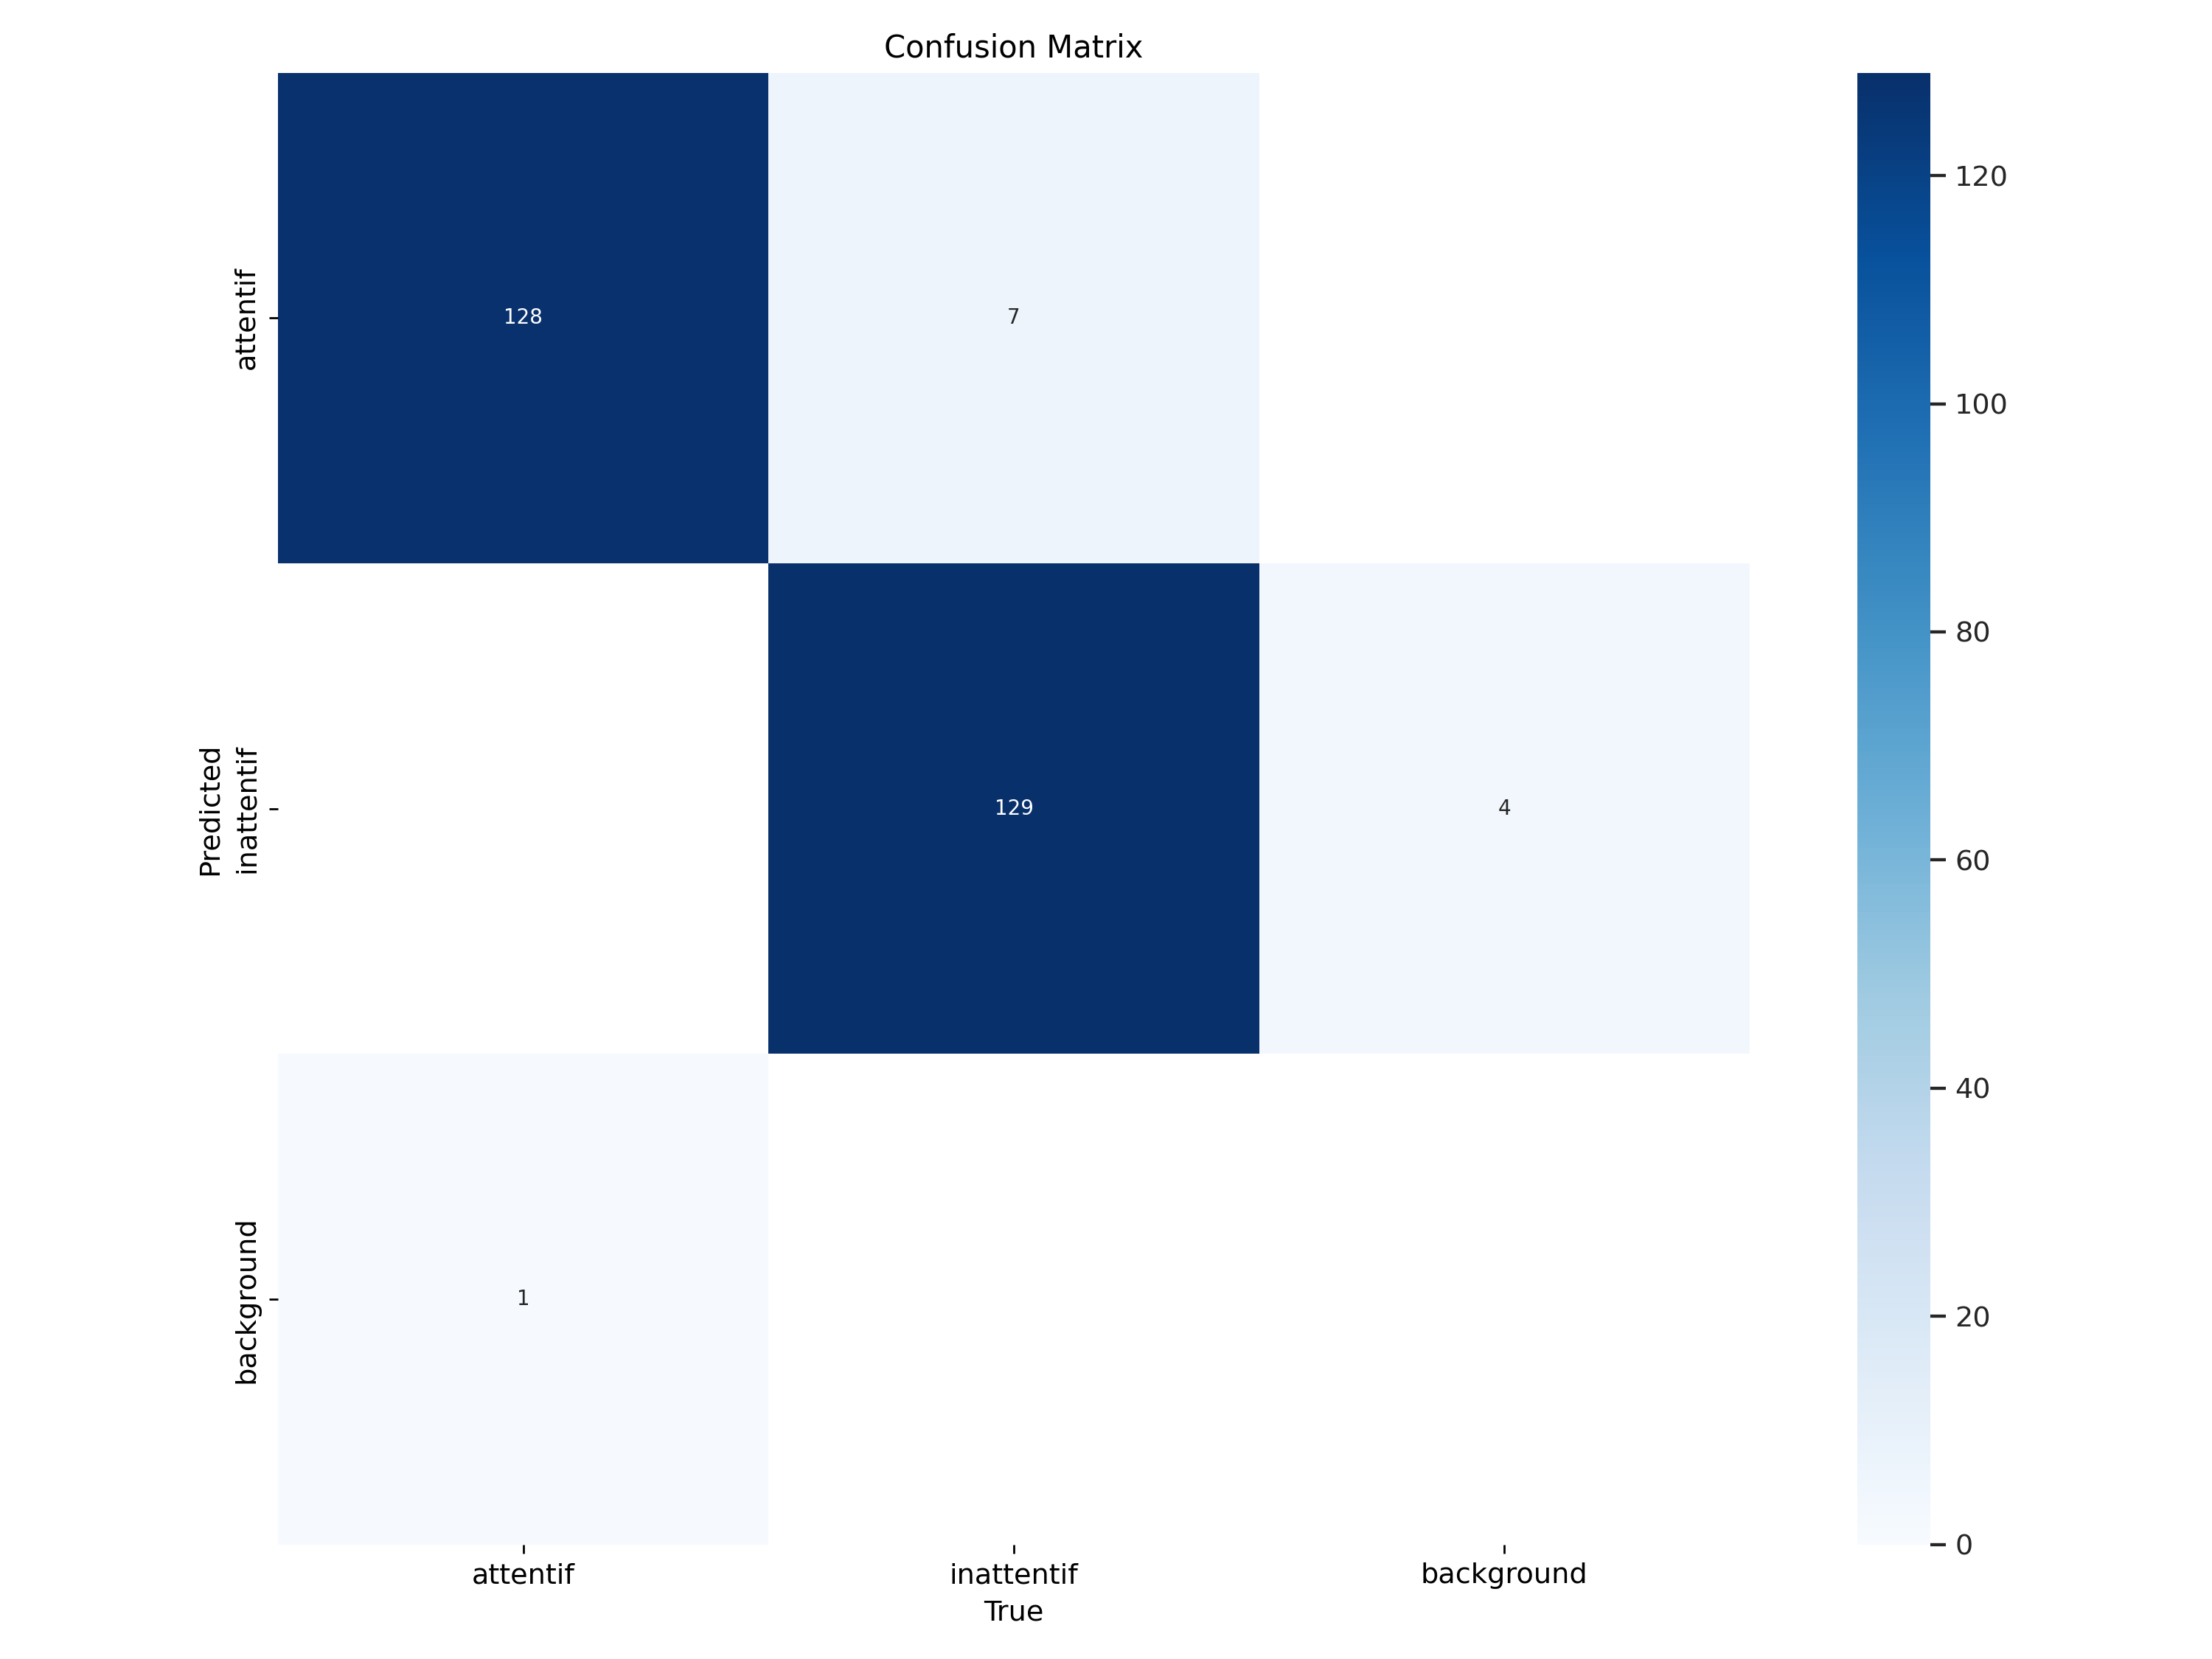

In [ ]:
Image(filename = f"/content/drive/MyDrive/Attentif_Inattentif_2/runs/detect/train/confusion_matrix.png")

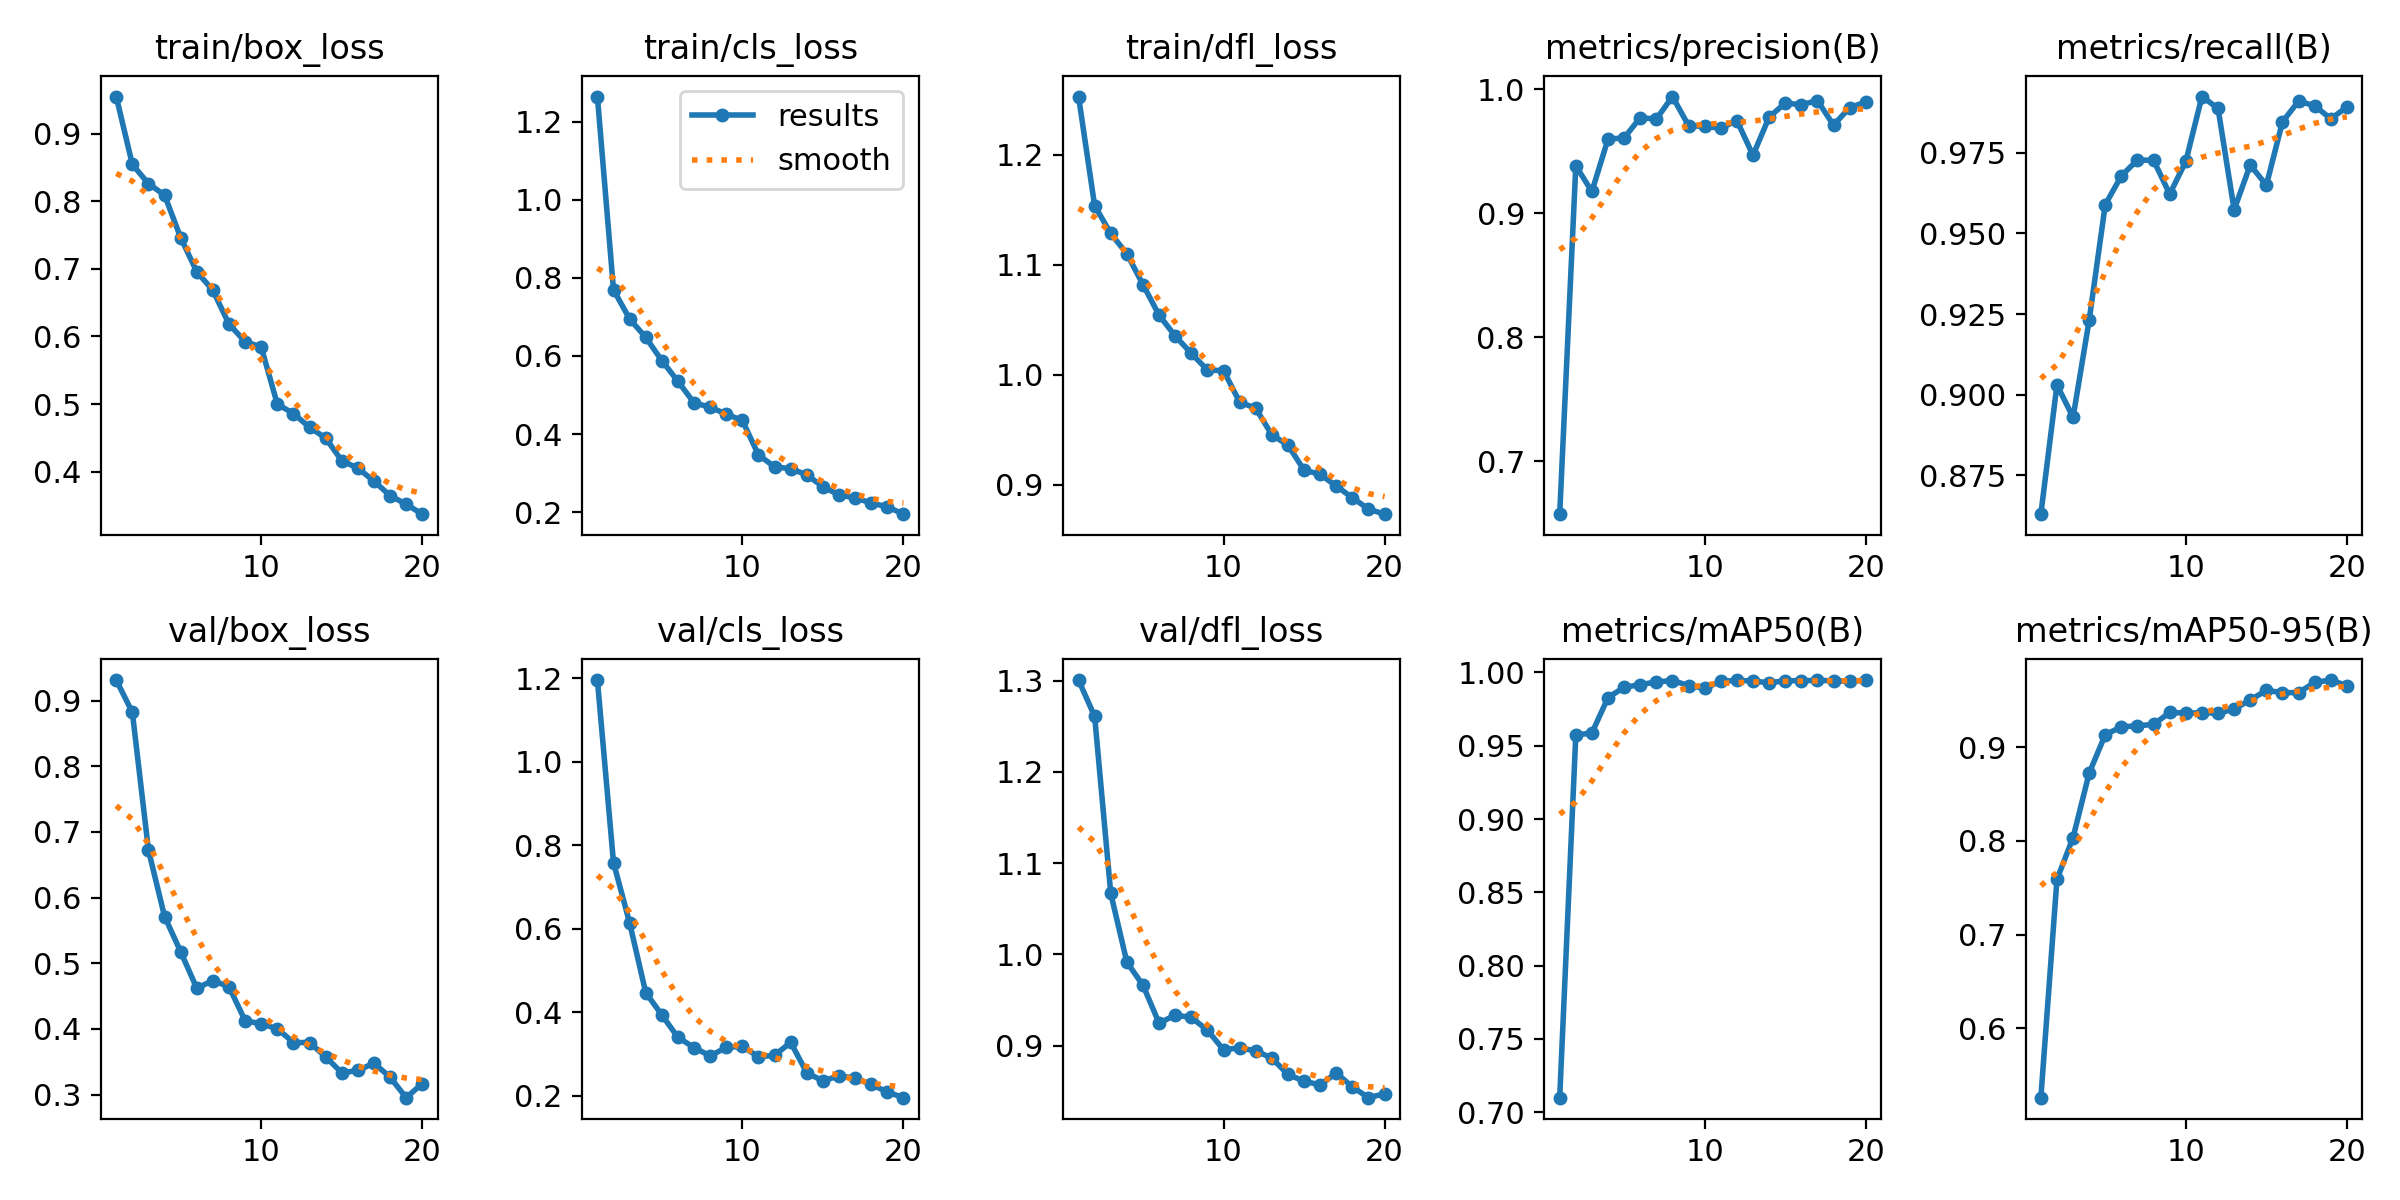

In [ ]:
Image(filename = f"/content/drive/MyDrive/Attentif_Inattentif_2/runs/detect/train/results.png", width = 600)

In [ ]:
! yolo task=detect \
mode=val \
model=/content/drive/MyDrive/Attentif_Inattentif_2/runs/detect/train/weights/best.pt \
data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Attentif_Inattentif_2/Drowsiness-Detetction-system-1/valid/labels.cache... 265 images, 0 backgrounds, 0 corrupt: 100% 265/265 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:11<00:00,  1.48it/s]
                   all        265        265      0.985      0.986      0.994      0.972
              attentif        265        129      0.971      0.992      0.993      0.971
            inattentif        265        136          1      0.979      0.995      0.972
Speed: 1.3ms preprocess, 11.1ms inference, 0.0ms loss, 11.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
! yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/Attentif_Inattentif_2/runs/detect/train/weights/best.pt \
conf=0.50 \
source={dataset.location}/test/images

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/131 /content/drive/MyDrive/Attentif_Inattentif_2/Drowsiness-Detetction-system-1/test/images/001_glasses_nonsleepyCombination_125_notdrowsy_jpg.rf.3c4167bf20bc8415d9302367f4d7c49d.jpg: 640x640 1 attentif, 16.5ms
image 2/131 /content/drive/MyDrive/Attentif_Inattentif_2/Drowsiness-Detetction-system-1/test/images/001_glasses_nonsleepyCombination_130_notdrowsy_jpg.rf.33c666aa8c362508aefcc7fbb04d8aea.jpg: 640x640 1 attentif, 16.5ms
image 3/131 /content/drive/MyDrive/Attentif_Inattentif_2/Drowsiness-Detetction-system-1/test/images/001_glasses_nonsleepyCombination_134_notdrowsy_jpg.rf.4acb22e654c91b18b9ff7b6bf6e796d6.jpg: 640x640 1 attentif, 16.4ms
image 4/131 /content/drive/MyDrive/Attentif_Inattentif_2/Drowsiness-Detetction-system-1/test/images/001_glasses_nonsleepyCombination_15_notdrowsy_jpg.rf.bb67715db7c3eba3ffda8